# Level1

### Load and Explore Data

In [64]:
import pandas as pd

# Load the dataset
file_path = "C:\\Users\\Admin\\OneDrive\\Documents\\Cognifyz-DataAnalysis\\Dataset .csv"  
df = pd.read_csv(file_path)

In [65]:
# Display the first few rows
df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [66]:
# Get summary statistics
df.describe()

,Restaurant ID,Country Code,Longitude,Latitude,Average Cost for two,Price range,Aggregate rating,Votes
count,9.551000e+03,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000
mean,9.051128e+06,18.365616,64.126574,25.854381,1199.210763,1.804837,2.666370,156.909748
std,8.791521e+06,56.750546,41.467058,11.007935,16121.183073,0.905609,1.516378,430.169145
min,5.300000e+01,1.000000,-157.948486,-41.330428,0.000000,1.000000,0.000000,0.000000
25%,3.019625e+05,1.000000,77.081343,28.478713,250.000000,1.000000,2.500000,5.000000
50%,6.004089e+06,1.000000,77.191964,28.570469,400.000000,2.000000,3.200000,31.000000
75%,1.835229e+07,1.000000,77.282006,28.642758,700.000000,2.000000,3.700000,131.000000
max,1.850065e+07,216.000000,174.832089,55.976980,800000.000000,4.000000,4.900000,10934.000000


In [67]:
# Check for missing values
df.isnull().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

In [69]:
#checking duplicate values
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
9546    False
9547    False
9548    False
9549    False
9550    False
Length: 9551, dtype: bool

# Level 1: Task 1

### Task: Top Cuisines

a) Determine the top three most common cuisines in the dataset.

In [70]:
# Split the Cuisines column and create a list of all cuisines
all_cuisines = df['Cuisines'].str.split(',').explode().str.strip()

# Count the occurrences of each cuisine
cuisine_counts = all_cuisines.value_counts()

In [71]:
# Get the top three cuisines
top_three_cuisines = cuisine_counts.head(3)

top_three_cuisines,

(Cuisines
 North Indian    3960
 Chinese         2735
 Fast Food       1986
 Name: count, dtype: int64,)

b) Calculate the percentage of restaurants that serve each of the top cuisines.

In [72]:
# Calculate the percentage of restaurants that serve each of the top cuisines
total_restaurants = len(df)
top_cuisines_percentage = (top_three_cuisines / total_restaurants) * 100

# Display the results
top_cuisines_percentage

Cuisines
North Indian    41.461627
Chinese         28.635745
Fast Food       20.793634
Name: count, dtype: float64

# Level 1: Task 2

### Task: City Analysis

a) Identify the city with the highest number of restaurants in the dataset.

In [73]:
# 1. Identify the city with the highest number of restaurants
city_restaurant_counts = df['City'].value_counts()
top_city_by_restaurants = city_restaurant_counts.idxmax()
# Display the results
top_city_by_restaurants

'New Delhi'

b) Calculate the average rating for restaurants in each city.

In [74]:
top_city_restaurant_count = city_restaurant_counts.max()
average_rating_by_city = df.groupby('City')['Aggregate rating'].mean()

top_city_restaurant_count


5473

c) Determine the city with the highest average rating.

In [75]:
top_city_by_rating = average_rating_by_city.idxmax()
highest_average_rating = average_rating_by_city.max()

top_city_by_rating, highest_average_rating


('Inner City', 4.9)

# Level 1: Task 3

### Task: Price Range Distribution

a) Create a histogram or bar chart to visualize the distribution of price ranges among the restaurants.

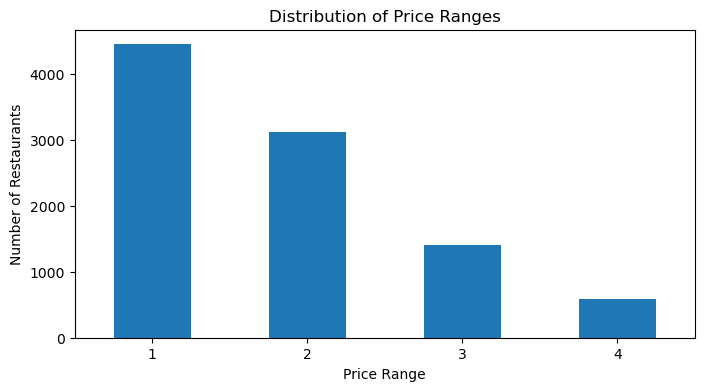

In [86]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 4))
df['Price range'].value_counts().sort_index().plot(kind='bar')
plt.title('Distribution of Price Ranges')
plt.xlabel('Price Range')
plt.ylabel('Number of Restaurants')
plt.xticks(rotation=0)
plt.show()

b) Calculate the percentage of restaurants in each price range category.

In [77]:
price_range_counts = df['Price range'].value_counts().sort_index()
total_restaurants = len(df)
price_range_percentages = (price_range_counts / total_restaurants) * 100

print(price_range_percentages)


Price range
1    46.529159
2    32.593446
3    14.741912
4     6.135483
Name: count, dtype: float64


# Level 1: Task 4

### Task: Online Delivery

a) Determine the percentage of restaurants that offer online delivery.

In [78]:
online_delivery_counts = df['Has Online delivery'].value_counts()
percentage_online_delivery = (online_delivery_counts['Yes'] / len(df)) * 100

print(f"Percentage of restaurants that offer online delivery: {percentage_online_delivery:.2f}%")

Percentage of restaurants that offer online delivery: 25.66%


b) Compare the average ratings of restaurants with and without online delivery.